In [53]:
from keras.datasets import fashion_mnist

(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

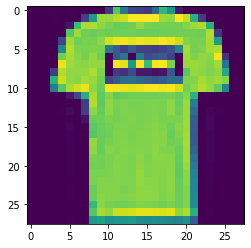

In [55]:
plt.imshow(x_train[1])

### Processing the data

In [56]:
x_train=x_train/255
x_test=x_test/255

In [57]:
x_train.shape

(60000, 28, 28)

In [58]:
y_train.shape

(60000,)

In [59]:
x_train=x_train.reshape(60000,28,28,1)

In [60]:
x_test=x_test.reshape(10000,28,28,1)

In [61]:
x_test.shape

(10000, 28, 28, 1)

In [62]:
from keras.utils.np_utils import to_categorical

In [63]:
y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

In [64]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### Building the model

In [65]:
from keras.models import Sequential
from keras.layers import Dense,MaxPooling2D,Conv2D,Flatten

In [66]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Training the model

In [68]:
model.fit(x_train,y_train_cat,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 26s 425us/step - loss: 0.4029 - accuracy: 0.8573
Epoch 2/10
60000/60000 [==============================] - 27s 455us/step - loss: 0.2771 - accuracy: 0.9003
Epoch 3/10
60000/60000 [==============================] - 26s 439us/step - loss: 0.2396 - accuracy: 0.9133
Epoch 4/10
60000/60000 [==============================] - 28s 465us/step - loss: 0.2149 - accuracy: 0.9234
Epoch 5/10
60000/60000 [==============================] - 30s 505us/step - loss: 0.1946 - accuracy: 0.9303
Epoch 6/10
60000/60000 [==============================] - 33s 542us/step - loss: 0.1809 - accuracy: 0.9362s - los
Epoch 7/10
60000/60000 [==============================] - 36s 593us/step - loss: 0.1685 - accuracy: 0.9400
Epoch 8/10
60000/60000 [==============================] - 31s 522us/step - loss: 0.1564 - accuracy: 0.9452
Epoch 9/10
60000/60000 [==============================] - 34s 562us/step - loss: 0.1480 - accuracy: 0.9477
Epoch 10/10
60000/60000 [=====

### Evaluating the Model

In [69]:
model.metrics_names

['loss', 'accuracy']

In [70]:
model.evaluate(x_test,y_test_cat)

10000/10000 [==============================] - 1s 133us/step


[0.3207698974251747, 0.9079999923706055]

In [71]:
from sklearn.metrics import classification_report,confusion_matrix

In [72]:
predictions=model.predict_classes(x_test)

In [73]:
predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [74]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [75]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.87      0.86      1000
           3       0.91      0.92      0.92      1000
           4       0.90      0.81      0.85      1000
           5       0.97      0.98      0.98      1000
           6       0.73      0.77      0.75      1000
           7       0.98      0.91      0.94      1000
           8       0.99      0.98      0.98      1000
           9       0.92      0.98      0.95      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

